## 序列化
在程序运行的过程中，所有的变量都是在内存中，比如，定义一个dict：

d = dict(name='Bob', age=20, score=88)



可以随时修改变量，比如把name改成'Bill'，但是一旦程序结束，变量所占用的内存就被操作系统全部回收。如果没有把修改后的'Bill'存储到磁盘上，下次重新运行程序，变量又被初始化为'Bob'。

我们把变量从内存中变成可存储或传输的过程称之为序列化，在Python中叫pickling，在其他语言中也被称之为serialization，marshalling，flattening等等，都是一个意思。

序列化之后，就可以把序列化后的内容写入磁盘，或者通过网络传输到别的机器上。

反过来，把变量内容从序列化的对象重新读到内存里称之为反序列化，即unpickling。

Python提供了pickle模块来实现序列化。

首先，我们尝试把一个对象序列化并写入文件：

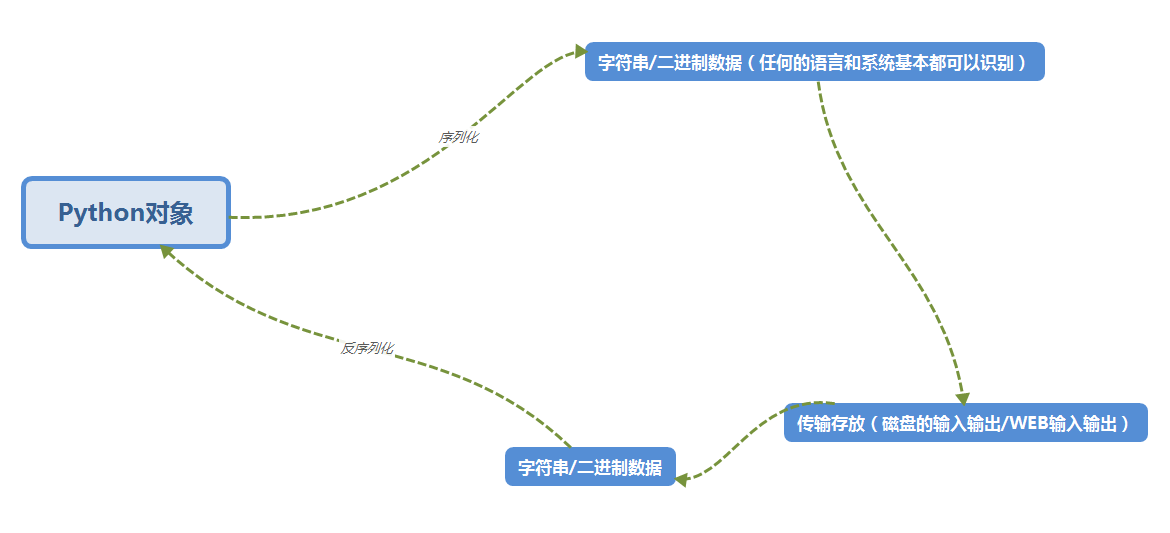

In [ ]:
# d = dict(name='你好',age=20, score=88)
d = {'name': '你好', 'age': 20, 'score': 88}

In [3]:
import pickle

class Student:
    def __init__(self):
        self.name='sxt'
    def speack(self):
        print(self.name)
        
ss = Student()


d = [1,2,3,4,5,{'name': '你好', 'age': 20, 'score': 88},Student,ss]
print(d)

dir(pickle)

#将字典/对象转换成二进制的数据
content = pickle.dumps(d)
# json.dumps(d,ensure_ascii=False)
print(content)

with open('./save.txt','wb') as f:
    f.write(content)


[1, 2, 3, 4, 5, {'name': '你好', 'age': 20, 'score': 88}, <class '__main__.Student'>, <__main__.Student object at 0x0000018C5FECA550>]
b'\x80\x03]q\x00(K\x01K\x02K\x03K\x04K\x05}q\x01(X\x04\x00\x00\x00nameq\x02X\x06\x00\x00\x00\xe4\xbd\xa0\xe5\xa5\xbdq\x03X\x03\x00\x00\x00ageq\x04K\x14X\x05\x00\x00\x00scoreq\x05KXuc__main__\nStudent\nq\x06h\x06)\x81q\x07}q\x08h\x02X\x03\x00\x00\x00sxtq\tsbe.'


In [6]:
import pickle
with open('./save.txt','rb') as f:
    saveTxt = f.read()

    
print(saveTxt)

s1 =  pickle.loads(saveTxt)
s1

superS = s1[6]()
superS.speack()

# dir(s1)



b'\x80\x03]q\x00(K\x01K\x02K\x03K\x04K\x05}q\x01(X\x04\x00\x00\x00nameq\x02X\x06\x00\x00\x00\xe4\xbd\xa0\xe5\xa5\xbdq\x03X\x03\x00\x00\x00ageq\x04K\x14X\x05\x00\x00\x00scoreq\x05KXuc__main__\nStudent\nq\x06h\x06)\x81q\x07}q\x08h\x02X\x03\x00\x00\x00sxtq\tsbe.'
sxt


In [7]:
import pickle
student = {'name':'小明','age':22,'score':'99'}

# a = pickle.dumps(student)
with open('huamingce.txt','wb') as f:
    pickle.dump(student,f)

In [8]:
with open('huamingce.txt','rb') as f:
    yy = pickle.load(f)
print(yy)

{'name': '小明', 'age': 22, 'score': '99'}


pickle.dumps()方法把任意对象序列化成一个bytes，然后，就可以把这个bytes写入文件。或者用另一个方法pickle.dump()直接把对象序列化后写入一个文件：

In [3]:
f = open('dump.txt', 'wb')
pickle.dump(d, f)
f.close()

看看写入的dump.txt文件，一堆乱七八糟的内容，这些都是Python保存的对象内部信息。

当我们要把对象从磁盘读到内存时，可以先把内容读到一个bytes，然后用pickle.loads()方法反序列化出对象，也可以直接用pickle.load()方法从一个file-like Object中直接反序列化出对象。我们打开另一个Python命令行来反序列化刚才保存的对象：

In [4]:
f = open('dump.txt', 'rb')
d = pickle.load(f)
f.close()
d

{'age': 20, 'name': 'Bob', 'score': 88}

变量的内容又回来了！

当然，这个变量和原来的变量是完全不相干的对象，它们只是内容相同而已。

Pickle的问题和所有其他编程语言特有的序列化问题一样，就是它只能用于Python，并且可能不同版本的Python彼此都不兼容，因此，只能用Pickle保存那些不重要的数据，不能成功地反序列化也没关系。

## JSON
如果我们要在不同的编程语言之间传递对象，就必须把对象序列化为标准格式，比如XML，但更好的方法是序列化为JSON，因为JSON表示出来就是一个字符串，可以被所有语言读取，也可以方便地存储到磁盘或者通过网络传输。JSON不仅是标准格式，并且比XML更快，而且可以直接在Web页面中读取，非常方便。

JSON表示的对象就是标准的JavaScript语言的对象，JSON和Python内置的数据类型对应如下：

JSON类型 |	Python类型
--|--
{} |	dict
[] |	list
"string" |	str
1234.56 |	int或float
true/false |	True/False
null |	None
Python内置的json模块提供了非常完善的Python对象到JSON格式的转换。我们先看看如何把Python对象变成一个JSON

In [18]:
import json
#d = dict(name='Bob', age=20, score=88)
d = {"name": "老王", "age": 20, "score": 88}

strd = json.dumps(d,ensure_ascii=False)
print(strd)
with open('./d.json','w') as f:
    f.write(strd)

{"name": "老王", "age": 20, "score": 88}


In [19]:
with open('./d.json','r') as f:
    content= f.read()

tt = json.loads(content)
tt
dir(json)

['JSONDecodeError',
 'JSONDecoder',
 'JSONEncoder',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_default_decoder',
 '_default_encoder',
 'codecs',
 'decoder',
 'detect_encoding',
 'dump',
 'dumps',
 'encoder',
 'load',
 'loads',
 'scanner']

In [25]:
import json
d = {"name": "老王", "age": 20, "score": 98}

# strd = json.dumps(d,ensure_ascii=False)
print(d)
with open('./d.json','w') as f:
    json.dump(d,f)

{'name': '老王', 'age': 20, 'score': 98}


In [26]:
with open('./d.json','r') as f:
    tt = json.load(f)
#     content= f.read()

# tt = json.loads(content)
tt
# dir(json)

{'name': '老王', 'age': 20, 'score': 98}

In [12]:
import json
student = {'name':'xiaohei','age':'17','score':'99'}
txt = json.dumps(student)
with open('abc.json','w') as f:
    f.write(txt)

In [18]:
with open('abc.json','r') as f:
    student2 = f.read()
print(student2)
isinstance(student2,str)

tt = json.loads(student2)
isinstance(tt,str)
isinstance(tt,dict)

{"name": "xiaohei", "age": "17", "score": "99"}


True

dumps()方法返回一个str，内容就是标准的JSON。类似的，dump()方法可以直接把JSON写入一个file-like Object。

要把JSON反序列化为Python对象，用loads()或者对应的load()方法，前者把JSON的字符串反序列化，后者从file-like Object中读取字符串并反序列化：

In [6]:
json_str = '{"age": 20, "score": 88, "name": "Bob"}'
json.loads(json_str)

{'age': 20, 'name': 'Bob', 'score': 88}

**由于JSON标准规定JSON编码是UTF-8，所以我们总是能正确地在Python的str与JSON的字符串之间转换。**

### JSON进阶
Python的dict对象可以直接序列化为JSON的{}，不过，很多时候，我们更喜欢用class表示对象，比如定义Student类，然后序列化：

In [21]:
import json

class Student(object):
    def __init__(self, name, age, score):
        self.name = name
        self.age = age
        self.score = score

s = Student('Bob', 20, 88)
s.name
s.age
s.score
print(s)
s.__str__()
print(json.dumps(s))

TypeError: Object of type 'Student' is not JSON serializable

In [22]:
help(json.dumps)

Help on function dumps in module json:

dumps(obj, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` to a JSON formatted ``str``.
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the return value can contain non-ASCII
    characters if they appear in strings contained in ``obj``. Otherwise, all
    such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``OverflowError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    serialize out of range ``float`` values (``nan``, ``inf``, ``-inf``) in
    stric

错误的原因是Student对象不是一个可序列化为JSON的对象。

如果连class的实例对象都无法序列化为JSON，这肯定不合理！

别急，我们仔细看看dumps()方法的参数列表，可以发现，除了第一个必须的obj参数外，dumps()方法还提供了一大堆的可选参数：

https://docs.python.org/3/library/json.html#json.dumps

这些可选参数就是让我们来定制JSON序列化。前面的代码之所以无法把Student类实例序列化为JSON，是因为默认情况下，dumps()方法不知道如何将Student实例变为一个JSON的{}对象。

可选参数default就是把任意一个对象变成一个可序列为JSON的对象，我们只需要为Student专门写一个转换函数，再把函数传进去即可

In [32]:
# def student2dict(std):
#     return {
#         'name': std.name,
#         'age': std.age,
#         'score': std.score
#     }

def studentTransform(student):
    return [{
        'name':student.name,
        'age':student.age,
        'score':student.score
    },{
        'name':student.name,
        'age':student.age,
        'score':student.score
    }]

print(s.__dict__)
qq = json.dumps(s,default=studentTransform)
isinstance(qq,str)
print(qq)

{'name': 'Bob', 'age': 20, 'score': 88}
[{"name": "Bob", "age": 20, "score": 88}, {"name": "Bob", "age": 20, "score": 88}]


In [9]:
print(json.dumps(s, default=student2dict))

{"name": "Bob", "age": 20, "score": 88}


不过，下次如果遇到一个Teacher类的实例，照样无法序列化为JSON。我们可以偷个懒，把任意class的实例变为dict

In [10]:
print(json.dumps(s, default=lambda obj: obj.__dict__))

{"name": "Bob", "age": 20, "score": 88}


因为通常class的实例都有一个__dict__属性，它就是一个dict，用来存储实例变量。也有少数例外，比如定义了__slots__的class。

同样的道理，如果我们要把JSON反序列化为一个Student对象实例，loads()方法首先转换出一个dict对象，然后，我们传入的object_hook函数负责把dict转换为Student实例

In [11]:
def dict2student(d):
    return Student(d['name'], d['age'], d['score'])

In [12]:
json_str = '{"age": 20, "score": 88, "name": "Bob"}'
print(json.loads(json_str, object_hook=dict2student))

In [30]:
p =json.loads(qq)
isinstance(p,list)
s2 = Student(p[0]['name'],p[0]['age'],p[0]['score'])
print(s2)
s2.name

'Bob'

In [35]:
def  dictTransform(yy):
    print(yy)
    return Student(p[0]['name'],p[0]['age'],p[0]['score'])

json.loads(qq,object_hook=dictTransform)    

{'name': 'Bob', 'age': 20, 'score': 88}
{'name': 'Bob', 'age': 20, 'score': 88}


[<__main__.Student at 0x4e5bd30>, <__main__.Student at 0x4e5beb8>]

In [37]:
p

[{'age': 20, 'name': 'Bob', 'score': 88},
 {'age': 20, 'name': 'Bob', 'score': 88}]

AttributeError: 'list' object has no attribute 'read'